# **Analyzing Home-Field Advantage in the NFL**

In the world of professional sports, playing at home is often considered a key advantage for teams, especially in high-stakes leagues like the **NFL**(National Football League). **Home-field advantage** has become a central focus of debate, where teams seem to outperform when playing in their own stadium. This phenomenon raises questions: How much of an impact does playing at home truly have on **game outcomes**? What factors drive this advantage—could it be _travel fatigue_ for the _opposing team_, _weather familiarity_, or the electrifying _support of home fans_?

In this project, I examine data from **57 NFL seasons** (1966-2023) to uncover the influence of **home-field advantage**. Through the use of _statistical analysis_ and _visualizations_, I aim to quantify this advantage by exploring variables such as _team travel distances_, _weather conditions_, and _rivalries_. The goal is to move beyond anecdotal evidence and offer a comprehensive, data-driven perspective on how playing at home affects NFL teams’ chances of winning.

## Step 1: Load Data and look aroud
_Skipping the real first step, finding the goal of the project._ 
>
For this project, I used **two main datasets**. The first one, from _ESPN_, includes detailed stats from over **14,000 NFL games** played between **1966 and 2023**. It covers information such as **team matchups, scores, locations, spreads**, and even **weather conditions**, which gave me a lot of important information to work with. The second dataset came from _nflfootballstadiums.com_ and contains the **distances between all NFL stadiums**. This helped me look at how far teams had to travel and how that might affect their **performance**. Using both of these datasets allowed me to explore the factors that contribute to home-field advantage in the NFL.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

game_data = pd.read_csv('../raw_game_data.csv')
travel_distances = pd.read_csv('../raw_nfl_stadium_distances.csv')


Preview each dataset:

In [75]:
game_data.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_stadium,away_stadium
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,Hard Rock Stadium,Oakland Coliseum
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN,Unknown Stadium,Empower Field at Mile High
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN,Qualcomm Stadium,Highmark Stadium
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN,Hard Rock Stadium,MetLife Stadium
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN,Lambeau Field,Unknown Stadium


In [76]:
travel_distances.head()

,Stadium 1,Stadium 2,Distance (miles)
0,AT&T Stadium,MetLife Stadium,1387.206289
1,AT&T Stadium,Arrowhead Stadium,458.379758
2,AT&T Stadium,SoFi Stadium,1229.436052
3,AT&T Stadium,Lambeau Field,945.215205
4,AT&T Stadium,Allegiant Stadium,1057.060692


Now check the **datatypes** of each dataset to see what we are working with. 

In [77]:
print("Data types in Game Data:")
print(game_data.dtypes, "\n")

Data types in Game Data:
schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line         object
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
weather_detail          object
home_stadium            object
away_stadium            object
dtype: object 



In [78]:
print("Data types in Travel Distances:")
print(travel_distances.dtypes, "\n")

Data types in Travel Distances:
Stadium 1            object
Stadium 2            object
Distance (miles)    float64
dtype: object 



## Step 2: Data Cleaning and Preprocessing

The first step is to check if there is any **missing data**.

In [79]:
print("Missing values in Game Data:")
print(game_data.isnull().sum(), "\n")

Missing values in Game Data:
schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home               240
score_away               240
team_away                  0
team_favorite_id        2692
spread_favorite         2719
over_under_line         2729
stadium                    0
stadium_neutral            0
weather_temperature     1548
weather_wind_mph        1564
weather_humidity        5597
weather_detail         10946
home_stadium               0
away_stadium               0
dtype: int64 



In [80]:
print("Missing values in Travel Distances:")
print(travel_distances.isnull().sum(), "\n")

Missing values in Travel Distances:
Stadium 1           0
Stadium 2           0
Distance (miles)    0
dtype: int64 



Obtain all the game data of seasons **2023 and before**. (This is because the dataset includes partial data the 2024 season, which has not finished yet)

In [81]:
game_data = game_data[game_data['schedule_season'] <= 2023]

Round all the miles to **whole numbers**, so it is easier to work with.  

In [82]:
travel_distances['Distance (miles)'] = travel_distances['Distance (miles)'].round(0).astype(int)

Drop **unneccesary** columns

In [83]:
game_data = game_data.drop(columns=['weather_detail', 'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium_neutral'])
game_data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_stadium,away_stadium
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,Orange Bowl,83.0,6.0,71.0,Hard Rock Stadium,Oakland Coliseum
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,Rice Stadium,81.0,7.0,70.0,Unknown Stadium,Empower Field at Mile High
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,Balboa Stadium,70.0,7.0,82.0,Qualcomm Stadium,Highmark Stadium
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,Orange Bowl,82.0,11.0,78.0,Hard Rock Stadium,MetLife Stadium
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,Lambeau Field,64.0,8.0,62.0,Lambeau Field,Unknown Stadium


**Rename** the columns, as I will _merge_ the datasets on these columns later. 

In [84]:
travel_distances = travel_distances.rename(columns={
    'Stadium 1': 'home_stadium',
    'Stadium 2': 'away_stadium',
    'Distance (miles)': 'travel_distance'
})

Here I used **AI** to obtain a file of all the distances between NFL stadiums that are missing from my original dataset, and also add the data to itself, but in a reverse order so each pair of teams has two occurences, one where **Team A is home** and **Team B is away**, and one where **Team A is away** and **Team B is home**. I then read this file and set it as my _travel_distances_ dataset.

In [85]:
travel_distances = pd.read_csv('../stadium_distances.csv')

travel_distances.head()

,Unnamed: 0,home_stadium,away_stadium,distance
0,0,allegiant stadium,arrowhead stadium,1152
1,1,allegiant stadium,at&t stadium,1057
2,2,allegiant stadium,bank of america stadium,1958
3,3,allegiant stadium,caesars superdome,1492
4,4,allegiant stadium,empower field at mile high,626


I noticed the AI created an **uneeded index column**, so I **drop** it.

In [86]:
travel_distances = travel_distances.drop(travel_distances.columns[0], axis=1)
travel_distances.head()


,home_stadium,away_stadium,distance
0,allegiant stadium,arrowhead stadium,1152
1,allegiant stadium,at&t stadium,1057
2,allegiant stadium,bank of america stadium,1958
3,allegiant stadium,caesars superdome,1492
4,allegiant stadium,empower field at mile high,626


**Clean** the strings to make sure they are all in a **consistent format**.

In [87]:
game_data['home_stadium'] = game_data['home_stadium'].str.strip().str.lower()
game_data['away_stadium'] = game_data['away_stadium'].str.strip().str.lower()

travel_distances['home_stadium'] = travel_distances['home_stadium'].str.strip().str.lower()
travel_distances['away_stadium'] = travel_distances['away_stadium'].str.strip().str.lower()

travel_distances.head()

,home_stadium,away_stadium,distance
0,allegiant stadium,arrowhead stadium,1152
1,allegiant stadium,at&t stadium,1057
2,allegiant stadium,bank of america stadium,1958
3,allegiant stadium,caesars superdome,1492
4,allegiant stadium,empower field at mile high,626


Let's preview our _game_data_ dataset, just to see what we are working with.

In [88]:
game_data[['home_stadium', 'away_stadium']].head()

,home_stadium,away_stadium
0,hard rock stadium,oakland coliseum
1,unknown stadium,empower field at mile high
2,qualcomm stadium,highmark stadium
3,hard rock stadium,metlife stadium
4,lambeau field,unknown stadium


I notice that in the **home_stadium** and **away_stadium columns**, some of the values are _"unknown stadium"_. This seems to be due to the fact that some NFL teams have changed their names over the years, so the mapping of a stadium to it's team caused an error. 
>
To fix this, I will first I create a dictionary that **pairs the old names to the new names**. Then I use the **replace()** function to replace the teams in the dataset.
Next, I will replace all of the _"unknown stadium"_ values with the teams corresponding stadium, as defined in the **team_to_stadium** dictionary. 

In [89]:
team_name_updates = {
    'San Diego Chargers': 'Los Angeles Chargers',
    'Oakland Raiders': 'Las Vegas Raiders',
    'Los Angeles Raiders': 'Las Vegas Raiders',
    'Washington Redskins': 'Washington Commanders',
    'Washington Football Team': 'Washington Commanders',
    'St. Louis Rams': 'Los Angeles Rams',
    'St. Louis Cardinals': 'Arizona Cardinals',
    'Houston Oilers': 'Tennessee Titans',
    'Tennessee Oilers': 'Tennessee Titans',
    'Baltimore Colts': 'Indianapolis Colts',
    'Boston Patriots': 'New England Patriots',
    'Phoenix Cardinals': 'Arizona Cardinals'
}

game_data['team_home'] = game_data['team_home'].replace(team_name_updates)
game_data['team_away'] = game_data['team_away'].replace(team_name_updates)

In [90]:
team_to_stadium = {
    'Arizona Cardinals': 'state farm stadium',
    'Atlanta Falcons': 'mercedes-benz stadium',
    'Baltimore Ravens': 'm&t bank stadium',
    'Buffalo Bills': 'highmark stadium',
    'Carolina Panthers': 'bank of america stadium',
    'Chicago Bears': 'soldier field',
    'Cincinnati Bengals': 'paycor stadium',
    'Cleveland Browns': 'firstenergy stadium',
    'Dallas Cowboys': 'at&t stadium',
    'Denver Broncos': 'empower field at mile high',
    'Detroit Lions': 'ford field',
    'Green Bay Packers': 'lambeau field',
    'Houston Texans': 'nrg stadium',
    'Indianapolis Colts': 'lucas oil stadium',
    'Jacksonville Jaguars': 'tiaa bank field',
    'Kansas City Chiefs': 'arrowhead stadium',
    'Las Vegas Raiders': 'allegiant stadium',
    'Los Angeles Chargers': 'sofi stadium',
    'Los Angeles Rams': 'sofi stadium',
    'Miami Dolphins': 'hard rock stadium',
    'Minnesota Vikings': 'u.s. bank stadium',
    'New England Patriots': 'gillette stadium',
    'New Orleans Saints': 'caesars superdome',
    'New York Giants': 'metlife stadium',
    'New York Jets': 'metlife stadium',
    'Philadelphia Eagles': 'lincoln financial field',
    'Pittsburgh Steelers': 'acrisure stadium',
    'San Francisco 49ers': "levi's stadium",
    'Seattle Seahawks': 'lumen field',
    'Tampa Bay Buccaneers': 'raymond james stadium',
    'Tennessee Titans': 'nissan stadium',
    'Washington Commanders': 'fedexfield'
}

game_data['home_stadium'] = game_data.apply(
    lambda row: team_to_stadium.get(row['team_home'], row['home_stadium']) if row['home_stadium'] == 'unknown stadium' else row['home_stadium'],
    axis=1
)

game_data['away_stadium'] = game_data.apply(
    lambda row: team_to_stadium.get(row['team_away'], row['away_stadium']) if row['away_stadium'] == 'unknown stadium' else row['away_stadium'],
    axis=1
)


Now let's see if we fixed the problem. 

In [91]:
unknown_stadiums = game_data[(game_data['home_stadium'] == 'unknown stadium') | (game_data['away_stadium'] == 'unknown stadium')]

unknown_stadiums

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_stadium,away_stadium


Drop the **weather humidity** column and **schedule_week** column, as I won't be using these.

In [92]:
game_data = game_data.drop(columns=['weather_humidity', 'schedule_week'])
game_data.head()


,schedule_date,schedule_season,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,home_stadium,away_stadium
0,9/2/1966,1966,False,Miami Dolphins,14.0,23.0,Las Vegas Raiders,Orange Bowl,83.0,6.0,hard rock stadium,oakland coliseum
1,9/3/1966,1966,False,Tennessee Titans,45.0,7.0,Denver Broncos,Rice Stadium,81.0,7.0,nissan stadium,empower field at mile high
2,9/4/1966,1966,False,Los Angeles Chargers,27.0,7.0,Buffalo Bills,Balboa Stadium,70.0,7.0,qualcomm stadium,highmark stadium
3,9/9/1966,1966,False,Miami Dolphins,14.0,19.0,New York Jets,Orange Bowl,82.0,11.0,hard rock stadium,metlife stadium
4,9/10/1966,1966,False,Green Bay Packers,24.0,3.0,Indianapolis Colts,Lambeau Field,64.0,8.0,lambeau field,lucas oil stadium


Now that everything is fixed, we can move on.

## Step 3: Merging and Preparing the Datasets

**Merge** the datasets on the **home** and **away** **stadiums**.

In [93]:
merged_game_data = pd.merge(game_data, travel_distances, how='left', left_on=['home_stadium', 'away_stadium'], right_on=['home_stadium', 'away_stadium'])

Now I want to see if the **merge** has worked, and if there are any rows in which the _distance_ is **NaN**

In [94]:
rows_with_nan = merged_game_data[merged_game_data.isna().any(axis=1)]

rows_with_nan

,schedule_date,schedule_season,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,home_stadium,away_stadium,distance
44,10/2/1966,1966,False,Kansas City Chiefs,14.0,29.0,Buffalo Bills,Kansas City Municipal Stadium,NaN,NaN,arrowhead stadium,highmark stadium,892
50,10/8/1966,1966,False,Buffalo Bills,10.0,20.0,New England Patriots,War Memorial Stadium,NaN,NaN,highmark stadium,gillette stadium,436
52,10/8/1966,1966,False,Kansas City Chiefs,37.0,10.0,Denver Broncos,Kansas City Municipal Stadium,NaN,NaN,arrowhead stadium,empower field at mile high,529
53,10/8/1966,1966,False,New York Jets,17.0,16.0,Los Angeles Chargers,Shea Stadium,NaN,NaN,metlife stadium,qualcomm stadium,2439
57,10/9/1966,1966,False,Las Vegas Raiders,21.0,10.0,Miami Dolphins,Oakland Coliseum,NaN,NaN,oakland coliseum,hard rock stadium,2584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196,1/7/2024,2023,False,New England Patriots,3.0,17.0,New York Jets,Gillette Stadium,NaN,NaN,gillette stadium,metlife stadium,170
14198,1/7/2024,2023,False,New York Giants,27.0,10.0,Philadelphia Eagles,MetLife Stadium,NaN,NaN,metlife stadium,lincoln financial field,85
14199,1/7/2024,2023,False,San Francisco 49ers,20.0,21.0,Los Angeles Rams,Levi's Stadium,NaN,NaN,levi's stadium,sofi stadium,339
14200,1/7/2024,2023,False,Tennessee Titans,28.0,20.0,Jacksonville Jaguars,Nissan Stadium,NaN,NaN,nissan stadium,tiaa bank field,517


Since there is **missing data** in the _weather temperature_ column, find the **average** of the temperature at **each stadium** and use that to fill it into the **missing values**

#### First Step: Find the _average temperature_ by stadium

In [95]:
avg_temp_by_stadium = merged_game_data.groupby('home_stadium')['weather_temperature'].mean()
print(avg_temp_by_stadium)

home_stadium
acrisure stadium                 48.056723
allegiant stadium                72.000000
arrowhead stadium                50.643038
at&t stadium                     63.029787
bank of america stadium          58.507538
caesars superdome                71.230435
empower field at mile high       48.015801
fedexfield                       54.217703
firstenergy stadium              49.049875
ford field                       68.339869
gillette stadium                 50.194774
hard rock stadium                76.185096
highmark stadium                 48.475490
lambeau field                    44.065574
levi's stadium                   57.809745
lincoln financial field          52.819905
los angeles memorial coliseum    62.459184
lucas oil stadium                65.919588
lumen field                      62.348525
m&t bank stadium                 53.863636
mercedes-benz stadium            65.550976
metlife stadium                  53.027228
nissan stadium                   65.77722

#### Second Step: Fill it into the dataset

In [96]:
merged_game_data['weather_temperature'] = merged_game_data.apply(
    lambda row: avg_temp_by_stadium[row['home_stadium']] if pd.isna(row['weather_temperature']) else row['weather_temperature'],
    axis=1
)

#### Third Step: Round all the _temperature values_ to **whole numbers**. 

In [97]:
merged_game_data['weather_temperature'] = merged_game_data['weather_temperature'].round().astype(int)

#### Fourth Step: Check to see if there are any more **missing values**.

In [98]:
print(merged_game_data['weather_temperature'].isna().sum())

0


I will then check other related variables for this same thing.

In [99]:
print(merged_game_data['weather_wind_mph'].isna().sum())

1449


I see the _weather_wind_mph_ column has lots of **missing values**, so I will do the same process as before.

#### Step 1: Find the _average wind speed_ by stadium.

In [100]:
avg_wind_by_stadium = merged_game_data.groupby('home_stadium')['weather_wind_mph'].mean()


#### Step 2: Fill it into the dataset.

In [101]:
merged_game_data['weather_wind_mph'] = merged_game_data.apply(
    lambda row: avg_wind_by_stadium[row['home_stadium']] if pd.isna(row['weather_wind_mph']) else row['weather_wind_mph'],
    axis=1
)

#### Step 3: Round all the values to **whole numbers**.

In [102]:
merged_game_data['weather_wind_mph'] = merged_game_data['weather_wind_mph'].round().astype(int)


#### Step 4: Check if there are any **missing values**.

In [103]:
print(merged_game_data['weather_wind_mph'].isna().sum())

0


Here I turn the dataset into a file, so I have it saved on my computer as a **backup**.

In [104]:
merged_game_data.to_csv('merged_dataset.csv')

## Step 4: Exploratory Data Analysis and Engineering

Add a new column, the _home_win_margin_, to see how much the **home team wins** by in each game. Then add another column, showing **whether or not the home team won**. 1 for a win, 0 for a loss. 

In [105]:
merged_game_data['home_win_margin'] = merged_game_data['score_home'] - merged_game_data['score_away']
merged_game_data['home_team_won'] = (merged_game_data['home_win_margin'] > 0).astype(int)
merged_game_data.head()

,schedule_date,schedule_season,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,home_stadium,away_stadium,distance,home_win_margin,home_team_won
0,9/2/1966,1966,False,Miami Dolphins,14.0,23.0,Las Vegas Raiders,Orange Bowl,83,6,hard rock stadium,oakland coliseum,3000,-9.0,0
1,9/2/1966,1966,False,Miami Dolphins,14.0,23.0,Las Vegas Raiders,Orange Bowl,83,6,hard rock stadium,oakland coliseum,2584,-9.0,0
2,9/3/1966,1966,False,Tennessee Titans,45.0,7.0,Denver Broncos,Rice Stadium,81,7,nissan stadium,empower field at mile high,1016,38.0,1
3,9/4/1966,1966,False,Los Angeles Chargers,27.0,7.0,Buffalo Bills,Balboa Stadium,70,7,qualcomm stadium,highmark stadium,2201,20.0,1
4,9/9/1966,1966,False,Miami Dolphins,14.0,19.0,New York Jets,Orange Bowl,82,11,hard rock stadium,metlife stadium,1087,-5.0,0


Create **bins** so we can _categorize_ how strong the wind was in each game. 

In [106]:
merged_game_data['wind_category'] = pd.cut(
    merged_game_data['weather_wind_mph'], 
    bins=[-1, 0, 10, 20, 100], 
    labels=['none', 'low', 'moderate', 'high']
)

merged_game_data.head() 

,schedule_date,schedule_season,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,home_stadium,away_stadium,distance,home_win_margin,home_team_won,wind_category
0,9/2/1966,1966,False,Miami Dolphins,14.0,23.0,Las Vegas Raiders,Orange Bowl,83,6,hard rock stadium,oakland coliseum,3000,-9.0,0,low
1,9/2/1966,1966,False,Miami Dolphins,14.0,23.0,Las Vegas Raiders,Orange Bowl,83,6,hard rock stadium,oakland coliseum,2584,-9.0,0,low
2,9/3/1966,1966,False,Tennessee Titans,45.0,7.0,Denver Broncos,Rice Stadium,81,7,nissan stadium,empower field at mile high,1016,38.0,1,low
3,9/4/1966,1966,False,Los Angeles Chargers,27.0,7.0,Buffalo Bills,Balboa Stadium,70,7,qualcomm stadium,highmark stadium,2201,20.0,1,low
4,9/9/1966,1966,False,Miami Dolphins,14.0,19.0,New York Jets,Orange Bowl,82,11,hard rock stadium,metlife stadium,1087,-5.0,0,moderate


Round all _scores_ to **whole numbers**.

In [107]:
merged_game_data['score_home'] = merged_game_data['score_home'].round().astype(int)
merged_game_data['score_away'] = merged_game_data['score_away'].round().astype(int)
merged_game_data.head()


,schedule_date,schedule_season,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,home_stadium,away_stadium,distance,home_win_margin,home_team_won,wind_category
0,9/2/1966,1966,False,Miami Dolphins,14,23,Las Vegas Raiders,Orange Bowl,83,6,hard rock stadium,oakland coliseum,3000,-9.0,0,low
1,9/2/1966,1966,False,Miami Dolphins,14,23,Las Vegas Raiders,Orange Bowl,83,6,hard rock stadium,oakland coliseum,2584,-9.0,0,low
2,9/3/1966,1966,False,Tennessee Titans,45,7,Denver Broncos,Rice Stadium,81,7,nissan stadium,empower field at mile high,1016,38.0,1,low
3,9/4/1966,1966,False,Los Angeles Chargers,27,7,Buffalo Bills,Balboa Stadium,70,7,qualcomm stadium,highmark stadium,2201,20.0,1,low
4,9/9/1966,1966,False,Miami Dolphins,14,19,New York Jets,Orange Bowl,82,11,hard rock stadium,metlife stadium,1087,-5.0,0,moderate


I use this code below to see if there are any more **null values** in my dataset to so I can be done with **preprocessing**.

In [108]:
null_values = merged_game_data.isnull().sum()
null_values

schedule_date          0
schedule_season        0
schedule_playoff       0
team_home              0
score_home             0
score_away             0
team_away              0
stadium                0
weather_temperature    0
weather_wind_mph       0
home_stadium           0
away_stadium           0
distance               0
home_win_margin        0
home_team_won          0
wind_category          0
dtype: int64

_________________________________________________________________________________________________________________________________________

Next, I am going to create **travel bins**, so that I can **categorize** the **distances** teams have to _travel_. This is will help when we **visualize** the data.

In [109]:
travel_bins = [1, 660, 1320, 1980, 2640, 3300]

bin_labels = ['very short', 'short', 'medium', 'long', 'very long']

merged_game_data['travel_distance_bin'] = pd.cut(
    merged_game_data['distance'], 
    bins=travel_bins, 
    labels=bin_labels,
    include_lowest=True
)
#This code is to expilcitiy set a bin with a distance of 0 to 'no travel' for teams that share stadiums with one another.
merged_game_data['travel_distance_bin'] = merged_game_data['travel_distance_bin'].cat.add_categories('no travel')

merged_game_data.loc[merged_game_data['distance'] == 0, 'travel_distance_bin'] = 'no travel'

merged_game_data[['distance', 'travel_distance_bin']].head()

,distance,travel_distance_bin
0,3000,very long
1,2584,long
2,1016,short
3,2201,long
4,1087,short


I create a _win_rate_by_distance_ variable that shows the **win rate percentage** at each categorical bin. 

In [110]:
win_rate_by_distance = merged_game_data.groupby('travel_distance_bin')['home_team_won'].mean()
win_rate_by_distance = (win_rate_by_distance * 100).round(1)
win_rate_by_distance.head(6)

/var/folders/hj/ss74h5m100j0j4b3f9n9tknh0000gn/T/ipykernel_25189/144600722.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate_by_distance = merged_game_data.groupby('travel_distance_bin')['home_team_won'].mean()


travel_distance_bin
very short    56.5
short         57.6
medium        57.3
long          58.3
very long     49.2
no travel     37.5
Name: home_team_won, dtype: float64

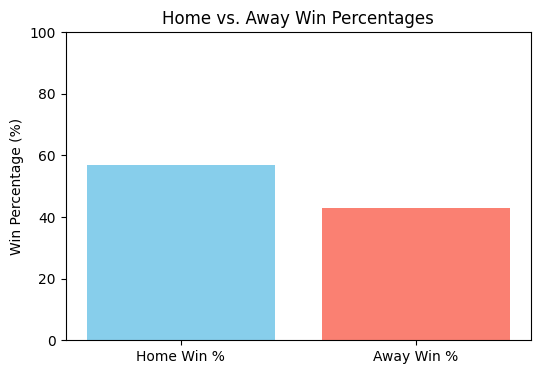

In [111]:
home_win_percentage = merged_game_data['home_team_won'].mean() * 100
away_win_percentage = (1 - merged_game_data['home_team_won']).mean() * 100

win_percentages = [home_win_percentage, away_win_percentage]
labels = ['Home Win %', 'Away Win %']

plt.figure(figsize=(6, 4))
plt.bar(labels, win_percentages, color=['skyblue', 'salmon'])
plt.title('Home vs. Away Win Percentages')
plt.ylabel('Win Percentage (%)')
plt.ylim(0, 100)
plt.show()

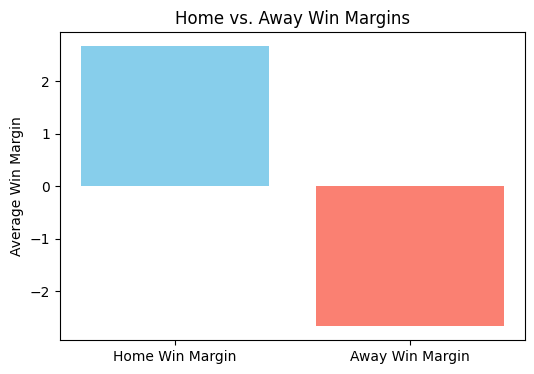

In [112]:
home_win_margin = merged_game_data['home_win_margin'].mean()
away_win_margin = (-merged_game_data['home_win_margin']).mean()  

win_margins = [home_win_margin, away_win_margin]
labels = ['Home Win Margin', 'Away Win Margin']

plt.figure(figsize=(6, 4))
plt.bar(labels, win_margins, color=['skyblue', 'salmon'])
plt.title('Home vs. Away Win Margins')
plt.ylabel('Average Win Margin')
plt.show()

### **What does this tell us?**
The charts above show that **home teams** win about **58%** of the time, while **away teams** win around **42%**, and **home teams** tend to win by a **larger margin** compared to **away teams**. The _average home win margin_ is **over 2 points**, while away teams generally lose by a similar margin. These numbers clearly **support** the concept of **home-field advantage** in the NFL.

Next, I will conduct two separate **t-tests**; one for _win percentages_ and one for _win margin_, to determine if the differences in the data are **statistically significant**.

In [113]:
merged_game_data['away_win_margin'] = -merged_game_data['home_win_margin']

home_win_margins = merged_game_data['home_win_margin']
away_win_margins = merged_game_data['away_win_margin']

t_stat, p_value = stats.ttest_ind(home_win_margins, away_win_margins, nan_policy='omit')

print(f"Home vs. Away Win Margins - T-statistic: {t_stat}, P-value: {p_value}")

Home vs. Away Win Margins - T-statistic: 30.19324352068121, P-value: 3.7793819620462044e-197


The **t-test** results for _home vs. away_ **win margins** show a **T-statistic of 30.19** and a **P-value of 3.78e-197**, which is incredibly **small**. This means there’s a huge difference between how much home and away teams win by. **Home teams** tend to win by much **larger margins**, and this difference isn’t due to random chance. It really highlights just how big of a role **home-field advantage** plays in NFL games, not only in winning but also in the size of the victory.

In [114]:
merged_game_data['away_team_won'] = 1 - merged_game_data['home_team_won']

home_win_rates = merged_game_data['home_team_won']
away_win_rates = merged_game_data['away_team_won']

t_stat, p_value = stats.ttest_ind(home_win_rates, away_win_rates, nan_policy='omit')

print(f"Home vs. Away Win Rates - T-statistic: {t_stat}, P-value: {p_value}")

Home vs. Away Win Rates - T-statistic: 23.995525852025825, P-value: 5.551412526859514e-126


The **t-test** above comparing _home vs. away_ **win rates** in the NFL showed a **t-statistic** of **23.99** and a **p-value of 5.55e-126**, indicating a **significant** difference. This suggests that home teams tend to win **more often** than away teams, supporting the idea of **home-field advantage**. However, since the win rates are directly related (one team wins, the other loses), the extremely small p-value reflects this. 

_________________________________________________________________________________________________________________________________________

Below, I create a **bar graph** to see if there is a **correlation** between the _home team's win rate_ and the _away team's travel distance._

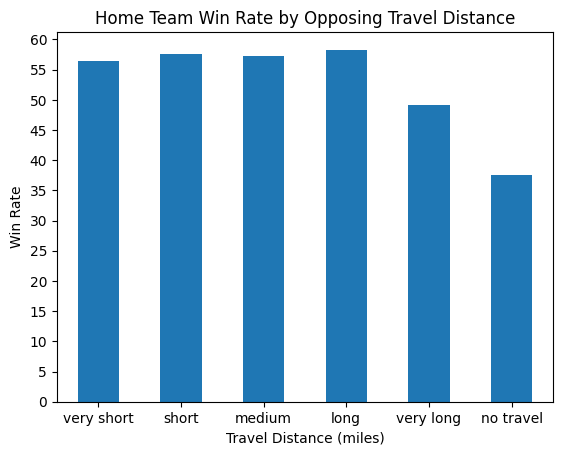

In [115]:
win_rate_by_distance.plot(kind='bar')
plt.title('Home Team Win Rate by Opposing Travel Distance')
plt.xlabel('Travel Distance (miles)')
plt.ylabel('Win Rate')

plt.yticks(range(0, int(win_rate_by_distance.max()) + 5, 5))

plt.xticks(rotation=0)

plt.show()

### **What we can gather from the graph:**
The graph above illustrates that the _home team’s win rate_ is **consistently higher** when the away team **has** to travel, compared to instances where **no travel** is required. The only cases where the away team doesn’t travel are when teams share the same home stadium, as seen with the Los Angeles Chargers and Los Angeles Rams.

_________________________________________________________________________________________________________________________________________

I then get the __average__ *weather temp* and **wind speed** at each stadium. I add this to the _merged_game_data_ dataset. 

In [116]:
normal_conditions_by_stadium = merged_game_data.groupby('home_stadium')[['weather_temperature', 'weather_wind_mph']].mean().round(1)

merged_game_data = merged_game_data.merge(normal_conditions_by_stadium, on='home_stadium', suffixes=('', '_home_avg'))

Here is where I add two columns called _temperature_familiary_ and _wind_familiary_ to my dataset which say whether or not the team is **used to the conditions** that were played at the game (**familiar** or **unfamiliar**). 

In [117]:
merged_game_data['temperature_familiarity'] = merged_game_data.apply(
    lambda row: 'familiar' if abs(row['weather_temperature'] - row['weather_temperature_home_avg']) <= 15  else 'unfamiliar',
    axis=1
)

merged_game_data['wind_familiarity'] = merged_game_data.apply(
    lambda row: 'familiar' if abs(row['weather_wind_mph'] - row['weather_wind_mph_home_avg']) <= 10 else 'unfamiliar',
    axis=1
)

The cell below shows the _win rate_ for the home team based off of their **familiarity** with the _temperature_.

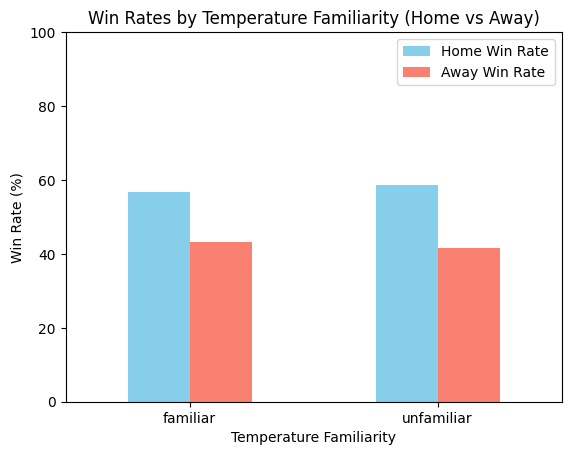

In [118]:
win_rate_by_temperature_familiarity = merged_game_data.groupby('temperature_familiarity')['home_team_won'].mean() * 100

away_win_rate_by_temperature_familiarity = 100 - win_rate_by_temperature_familiarity

win_rates_by_temperature_familiarity = pd.DataFrame({
    'Home Win Rate': win_rate_by_temperature_familiarity,
    'Away Win Rate': away_win_rate_by_temperature_familiarity
})

win_rates_by_temperature_familiarity.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Win Rates by Temperature Familiarity (Home vs Away)')
plt.xlabel('Temperature Familiarity')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100) 

plt.show()

The code below shows the same as above, but for _wind familiarity_. 

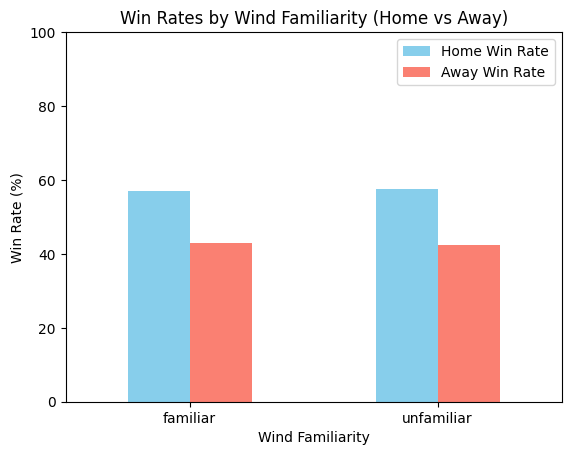

In [119]:
win_rate_by_wind_familiarity = merged_game_data.groupby('wind_familiarity')['home_team_won'].mean() * 100

away_win_rate_by_wind_familiarity = 100 - win_rate_by_wind_familiarity

win_rates_by_wind_familiarity = pd.DataFrame({
    'Home Win Rate': win_rate_by_wind_familiarity,
    'Away Win Rate': away_win_rate_by_wind_familiarity
})

win_rates_by_wind_familiarity.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Win Rates by Wind Familiarity (Home vs Away)')
plt.xlabel('Wind Familiarity')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100) 

plt.show()

The code below calculates **how much the home team wins by** when they are faced with **familiar** and **unfamiliar** **conditions**. 

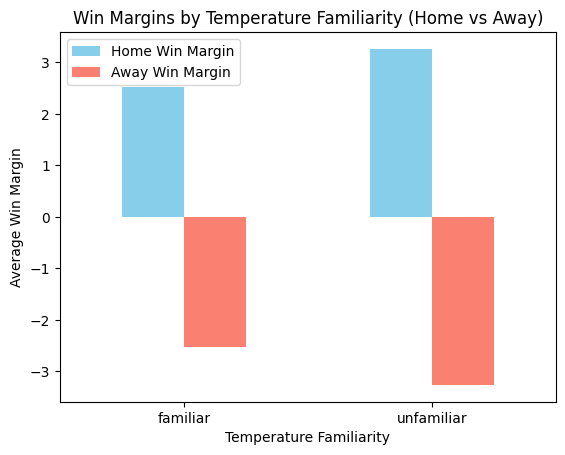

In [120]:
win_margin_by_temp_familiarity = merged_game_data.groupby('temperature_familiarity')['home_win_margin'].mean()

away_margin_by_temp_familiarity = -win_margin_by_temp_familiarity

win_margins_by_temp_familiarity = pd.DataFrame({
    'Home Win Margin': win_margin_by_temp_familiarity,
    'Away Win Margin': away_margin_by_temp_familiarity
})

win_margins_by_temp_familiarity.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Win Margins by Temperature Familiarity (Home vs Away)')
plt.xlabel('Temperature Familiarity')
plt.ylabel('Average Win Margin')
plt.xticks(rotation=0)
plt.show()

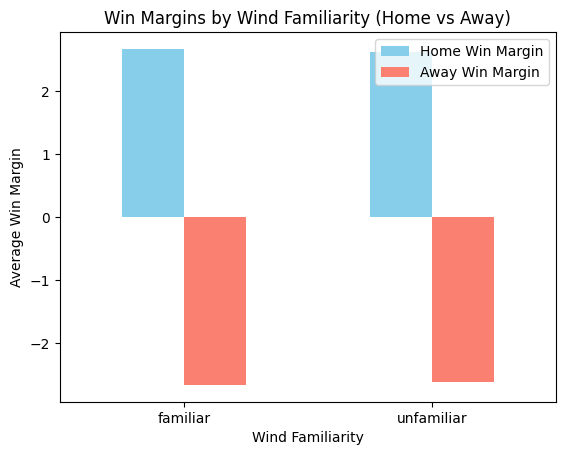

In [121]:
win_margin_by_wind_familiarity = merged_game_data.groupby('wind_familiarity')['home_win_margin'].mean()

away_margin_by_wind_familiarity = -win_margin_by_wind_familiarity

win_margins_by_wind_familiarity = pd.DataFrame({
    'Home Win Margin': win_margin_by_wind_familiarity,
    'Away Win Margin': away_margin_by_wind_familiarity
})

win_margins_by_wind_familiarity.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Win Margins by Wind Familiarity (Home vs Away)')
plt.xlabel('Wind Familiarity')
plt.ylabel('Average Win Margin')
plt.xticks(rotation=0)
plt.show()

### **What this indicates**:
We can see from the four graphs above that a team's **familiarity** with _weather conditions_ has **no effect** on the outcome of the game. In all graphs, the home team has a consistently _higher win rate_ and _win margin_, even if the away team is familiar with the weather conditions.  We can conclude that the home team performs better **regardless** of _weather conditions_.

Next I do the same as I did previously and conduct two **t-tests**, one for _temperature_ and one for _wind speed_.

In [122]:
familiar_temp_margins = merged_game_data[merged_game_data['temperature_familiarity'] == 'familiar']['home_win_margin']
unfamiliar_temp_margins = merged_game_data[merged_game_data['temperature_familiarity'] == 'unfamiliar']['home_win_margin']

t_stat_temp, p_value_temp = stats.ttest_ind(familiar_temp_margins, unfamiliar_temp_margins, nan_policy='omit')

print(f"Temperature Familiarity - T-statistic: {t_stat_temp}, P-value: {p_value_temp}")

familiar_wind_margins = merged_game_data[merged_game_data['wind_familiarity'] == 'familiar']['home_win_margin']
unfamiliar_wind_margins = merged_game_data[merged_game_data['wind_familiarity'] == 'unfamiliar']['home_win_margin']

t_stat_wind, p_value_wind = stats.ttest_ind(familiar_wind_margins, unfamiliar_wind_margins, nan_policy='omit')

print(f"Wind Familiarity - T-statistic: {t_stat_wind}, P-value: {p_value_wind}")

Temperature Familiarity - T-statistic: -2.3694661915336828, P-value: 0.017827063127151925
Wind Familiarity - T-statistic: 0.06351968475148594, P-value: 0.9493535778507926


The analysis reveals that temperature familiarity **significantly impacts** _home team performance_, as unfamiliar temperature conditions are associated with a smaller win margin for the home team **(p-value = 0.0178)**. On the other hand, _wind familiarity_ shows **no significant effect** on _win margins_, with almost identical results in familiar and unfamiliar wind conditions **(p-value = 0.9494)**. This suggests that while temperature plays a role in home-field advantage, _wind conditions_ may **not** have the same level of influence on the outcome of NFL games.

_________________________________________________________________________________________________________________________________________

The next few sections of code are about the **type of game** that is being played (playoff or regular season game). It compares the **outcome** of the game with **home** and **away teams** based on whether or not it is a **regular season game** or **playoff game**. 

#### **Why?** 
**Home-field advantage** in the **playoffs** can be more severe than in **regular-season games** due to the **increased pressure** on away teams and the impact of a **loud, engaged home crowd**. The stakes are higher, amplifying the **psychological pressure** on visiting teams, while the home crowd’s energy can **disrupt the away team’s communication** and **lead to mistakes**. Having a **bigger home fan base** can also **boost morale**, causing increased **confidence** and **energy**. 


In [123]:
merged_game_data['away_win_margin'] = -merged_game_data['home_win_margin']

In [124]:
playoff_games = merged_game_data[merged_game_data['schedule_playoff'] == True]
regular_season_games = merged_game_data[merged_game_data['schedule_playoff'] == False]

avg_home_win_margin_playoff = playoff_games['home_win_margin'].mean()
avg_away_win_margin_playoff = playoff_games['away_win_margin'].mean()

avg_home_win_margin_regular = regular_season_games['home_win_margin'].mean()
avg_away_win_margin_regular = regular_season_games['away_win_margin'].mean()

print(f'Average Home Win Margin (Playoff Games): {avg_home_win_margin_playoff}')
print(f'Average Away Win Margin (Playoff Games): {avg_away_win_margin_playoff}')
print(f'Average Home Win Margin (Regular Season Games): {avg_home_win_margin_regular}')
print(f'Average Away Win Margin (Regular Season Games): {avg_away_win_margin_regular}')

Average Home Win Margin (Playoff Games): 6.155143338954469
Average Away Win Margin (Playoff Games): -6.155143338954469
Average Home Win Margin (Regular Season Games): 2.5107163828537873
Average Away Win Margin (Regular Season Games): -2.5107163828537873


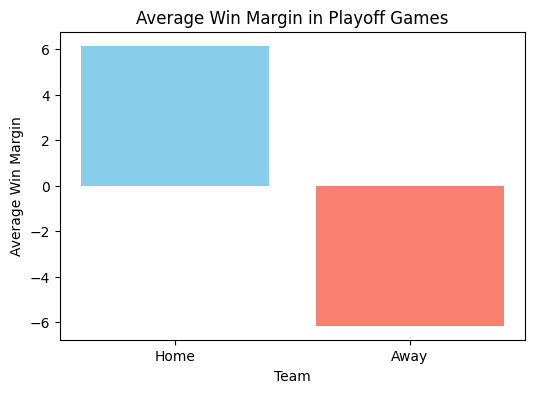

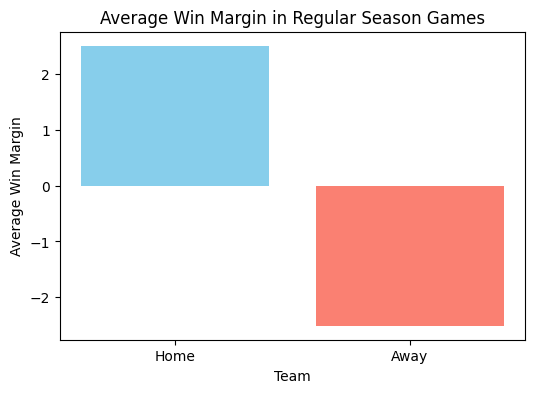

In [125]:
playoff_margins = [avg_home_win_margin_playoff, avg_away_win_margin_playoff]
labels = ['Home', 'Away']

plt.figure(figsize=(6, 4))
plt.bar(labels, playoff_margins, color=['skyblue', 'salmon'])
plt.title('Average Win Margin in Playoff Games')
plt.xlabel('Team')
plt.ylabel('Average Win Margin')
plt.show()

regular_margins = [avg_home_win_margin_regular, avg_away_win_margin_regular]
labels = ['Home', 'Away']

plt.figure(figsize=(6, 4))
plt.bar(labels, regular_margins, color=['skyblue', 'salmon'])
plt.title('Average Win Margin in Regular Season Games')
plt.xlabel('Team')
plt.ylabel('Average Win Margin')
plt.show()

In [126]:
home_win_rate_playoff = (playoff_games['home_team_won'].mean()) * 100
home_win_rate_regular = (regular_season_games['home_team_won'].mean()) * 100

away_win_rate_playoff = 100 - home_win_rate_playoff
away_win_rate_regular = 100 - home_win_rate_regular

print(f'Home Win Rate (Playoff Games): {home_win_rate_playoff}%')
print(f'Away Win Rate (Playoff Games): {away_win_rate_playoff}%')
print(f'Home Win Rate (Regular Season Games): {home_win_rate_regular}%')
print(f'Away Win Rate (Regular Season Games): {away_win_rate_regular}%')

Home Win Rate (Playoff Games): 65.93591905564924%
Away Win Rate (Playoff Games): 34.06408094435076%
Home Win Rate (Regular Season Games): 56.657369348209045%
Away Win Rate (Regular Season Games): 43.342630651790955%


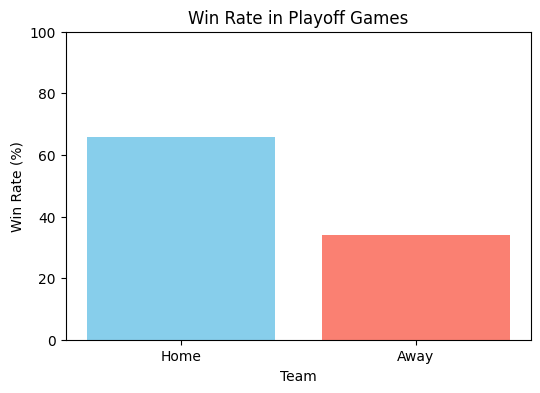

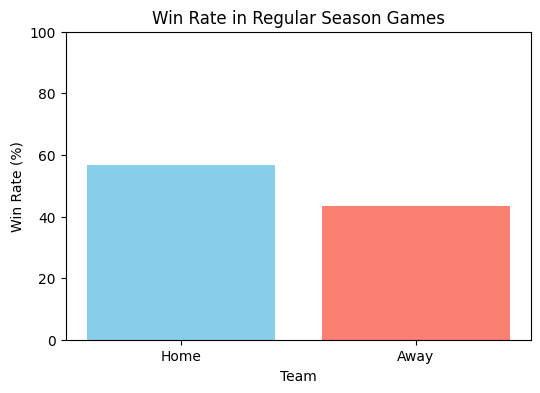

In [127]:
playoff_win_rates = [home_win_rate_playoff, away_win_rate_playoff]
labels = ['Home', 'Away']

plt.figure(figsize=(6, 4))
plt.bar(labels, playoff_win_rates, color=['skyblue', 'salmon'])
plt.title('Win Rate in Playoff Games')
plt.xlabel('Team')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)
plt.show()

regular_win_rates = [home_win_rate_regular, away_win_rate_regular]
labels = ['Home', 'Away']

plt.figure(figsize=(6, 4))
plt.bar(labels, regular_win_rates, color=['skyblue', 'salmon'])
plt.title('Win Rate in Regular Season Games')
plt.xlabel('Team')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100) 
plt.show()

### **What the visualizations tell us**:
After analyzing **regular season** and **playoff games**, the visualizations show that the **home team consistently outperforms** the away team in terms of _win rate_ and _win margin_, regardless of the game type. Furthermore, both the _average win margin_ and _win rate_ are **higher** for the home team in **playoff games** compared to **regular season matchups**. These findings **strongly support** the concept of _home-field advantage_.

Below I conduct a **t-test** with the _win margins_ of **playoff versus regular season games** to see if this is **statistically significant**.

In [128]:
playoff_margins = merged_game_data[merged_game_data['schedule_playoff'] == True]['home_win_margin']
regular_margins = merged_game_data[merged_game_data['schedule_playoff'] == False]['home_win_margin']

t_stat_playoff, p_value_playoff = stats.ttest_ind(playoff_margins, regular_margins, nan_policy='omit')

print(f"Playoffs vs. Regular Season - T-statistic: {t_stat_playoff}, P-value: {p_value_playoff}")

Playoffs vs. Regular Season - T-statistic: 5.848919543924191, P-value: 5.056490425172657e-09


There is a **highly significant difference** between _win margins_ in **playoff games** versus **regular season games**, with **home teams** performing **much better** in terms of _win margin_ during playoffs. This finding **supports** the idea that home-field advantage is even more pronounced in high-stakes playoff games compared to regular season games.

_________________________________________________________________________________________________________________________________________

The next piece of data I start analyzing are **rivalries**. Rivalry games create a unique home-field advantage due to **larger, louder crowds** that **boost** the home team’s **energy** and **morale** while _throwing off_ the away team. The emotional intensity and history behind these games push the **home team to perform better**, especially with increased media attention and higher stakes to defend their turf. The home team can often gain a mental edge, feeling more confident and comfortable in front of their fans. Special traditions also fuel the home crowd, making the atmosphere even more intense and difficult for the away team to handle. This can also sway the refs to make calls a certain way. 

Below I create a dictionary of all of the rivalries in the NFL. 
>
**Source**: https://www.espn.com

In [129]:
rivalries = {
    'Buffalo Bills': ['New England Patriots', 'Miami Dolphins'],
    'Miami Dolphins': ['New England Patriots'],
    'New England Patriots': ['Buffalo Bills', 'New York Jets', 'Indianapolis Colts'],
    'New York Jets': ['New England Patriots', 'Miami Dolphins'],

    'Baltimore Ravens': ['Pittsburgh Steelers'],
    'Cincinnati Bengals': ['Pittsburgh Steelers'],
    'Cleveland Browns': ['Pittsburgh Steelers'],
    'Pittsburgh Steelers': ['Baltimore Ravens', 'Cincinnati Bengals'],

    'Houston Texans': ['Indianapolis Colts'],
    'Indianapolis Colts': ['New England Patriots', 'Houston Texans'],
    'Jacksonville Jaguars': ['Tennessee Titans'],
    'Tennessee Titans': ['Indianapolis Colts'],

    'Denver Broncos': ['New England Patriots', 'Kansas City Chiefs'],
    'Kansas City Chiefs': ['Denver Broncos'],
    'Las Vegas Raiders': ['Denver Broncos'],
    'Los Angeles Chargers': ['Las Vegas Raiders'],

    'Dallas Cowboys': ['Washington Commanders', 'New York Giants', 'Philadelphia Eagles'],
    'New York Giants': ['Dallas Cowboys'],
    'Philadelphia Eagles': ['Dallas Cowboys'],
    'Washington Commanders': ['Dallas Cowboys'],

    'Chicago Bears': ['Green Bay Packers'],
    'Detroit Lions': ['Green Bay Packers'],
    'Green Bay Packers': ['Chicago Bears', 'Minnesota Vikings'],
    'Minnesota Vikings': ['Green Bay Packers'],

    'Atlanta Falcons': ['New Orleans Saints'],
    'Carolina Panthers': ['Atlanta Falcons'],
    'New Orleans Saints': ['Atlanta Falcons'],
    'Tampa Bay Buccaneers': ['Atlanta Falcons'],

    'Arizona Cardinals': ['Seattle Seahawks'],
    'Los Angeles Rams': ['San Francisco 49ers'],
    'San Francisco 49ers': ['Seattle Seahawks'],
    'Seattle Seahawks': ['Arizona Cardinals', 'San Francisco 49ers']
}

def is_rivalry_game(home_team, away_team, rivalries):
    if home_team in rivalries and away_team in rivalries[home_team]:
        return True
    return False

merged_game_data['is_rivalry'] = merged_game_data.apply(lambda row: is_rivalry_game(row['team_home'], row['team_away'], rivalries), axis=1)

merged_game_data[['team_home', 'team_away', 'is_rivalry']].tail()

,team_home,team_away,is_rivalry
14212,Detroit Lions,Tampa Bay Buccaneers,False
14213,Baltimore Ravens,Kansas City Chiefs,False
14214,Baltimore Ravens,Kansas City Chiefs,False
14215,San Francisco 49ers,Detroit Lions,False
14216,Kansas City Chiefs,San Francisco 49ers,False


This calculates the average amount the home team wins by in both rivalry and non-rivalry games.

In [130]:
rivalry_games = merged_game_data[merged_game_data['is_rivalry'] == True]
non_rivalry_games = merged_game_data[merged_game_data['is_rivalry'] == False]

avg_win_margin_rivalry = rivalry_games['home_win_margin'].mean()
avg_win_margin_non_rivalry = non_rivalry_games['home_win_margin'].mean()

print(f'Average Home Win Margin (Rivalry Games): {avg_win_margin_rivalry}')
print(f'Average Home Win Margin (Non-Rivalry Games): {avg_win_margin_non_rivalry}')

Average Home Win Margin (Rivalry Games): 1.7475130270014212
Average Home Win Margin (Non-Rivalry Games): 2.8223195109862877


Add a column to our dataset which contains the **amount of points the away team won by in each game**. Mathematically, this is just the opposite of the _home_win_margin_. 

In [131]:
merged_game_data['away_win_margin'] = -merged_game_data['home_win_margin']

In [132]:
rivalry_games = merged_game_data[merged_game_data['is_rivalry'] == True]
non_rivalry_games = merged_game_data[merged_game_data['is_rivalry'] == False]

avg_home_win_margin_rivalry = rivalry_games['home_win_margin'].mean()
avg_away_win_margin_rivalry = rivalry_games['away_win_margin'].mean()

avg_home_win_margin_non_rivalry = non_rivalry_games['home_win_margin'].mean()
avg_away_win_margin_non_rivalry = non_rivalry_games['away_win_margin'].mean()

print(f'Average Home Win Margin (Rivalry Games): {avg_home_win_margin_rivalry}')
print(f'Average Away Win Margin (Rivalry Games): {avg_away_win_margin_rivalry}')
print(f'Average Home Win Margin (Non-Rivalry Games): {avg_home_win_margin_non_rivalry}')
print(f'Average Away Win Margin (Non-Rivalry Games): {avg_away_win_margin_non_rivalry}')

Average Home Win Margin (Rivalry Games): 1.7475130270014212
Average Away Win Margin (Rivalry Games): -1.7475130270014212
Average Home Win Margin (Non-Rivalry Games): 2.8223195109862877
Average Away Win Margin (Non-Rivalry Games): -2.8223195109862877


I create a graph to show the **average win margin** for both **home** and **away** teams in **rivalry** games, then the same for **non-rivalry** games. 

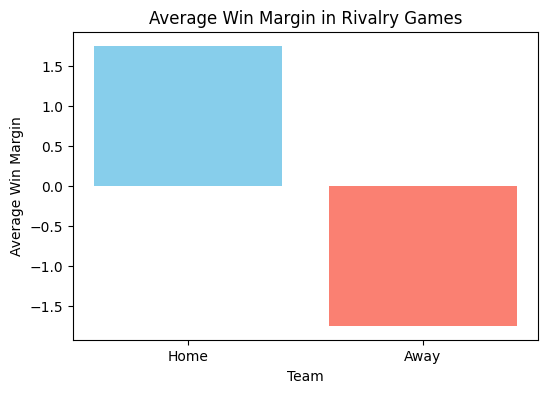

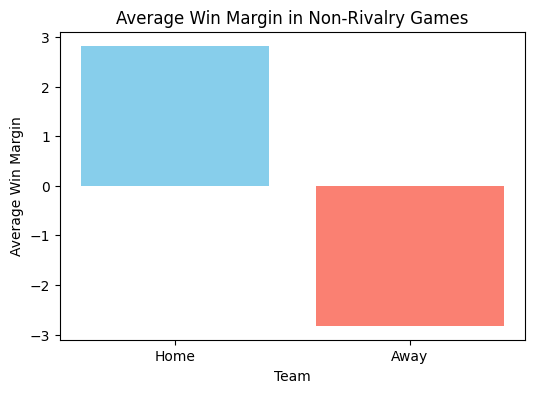

In [133]:
rivalry_margins = [avg_home_win_margin_rivalry, avg_away_win_margin_rivalry]
labels = ['Home', 'Away']

plt.figure(figsize=(6, 4))
plt.bar(labels, rivalry_margins, color=['skyblue', 'salmon'])
plt.title('Average Win Margin in Rivalry Games')
plt.xlabel('Team')
plt.ylabel('Average Win Margin')
plt.show()

non_rivalry_margins = [avg_home_win_margin_non_rivalry, avg_away_win_margin_non_rivalry]
labels = ['Home', 'Away']

plt.figure(figsize=(6, 4))
plt.bar(labels, non_rivalry_margins, color=['skyblue', 'salmon'])
plt.title('Average Win Margin in Non-Rivalry Games')
plt.xlabel('Team')
plt.ylabel('Average Win Margin')
plt.show()

I do the same below, just with **win percentages** instead of **win margin**.

In [134]:
home_win_percentage_rivalry = (rivalry_games['home_team_won'].mean()) * 100
home_win_percentage_non_rivalry = (non_rivalry_games['home_team_won'].mean()) * 100

away_win_percentage_rivalry = 100 - home_win_percentage_rivalry
away_win_percentage_non_rivalry = 100 - home_win_percentage_non_rivalry

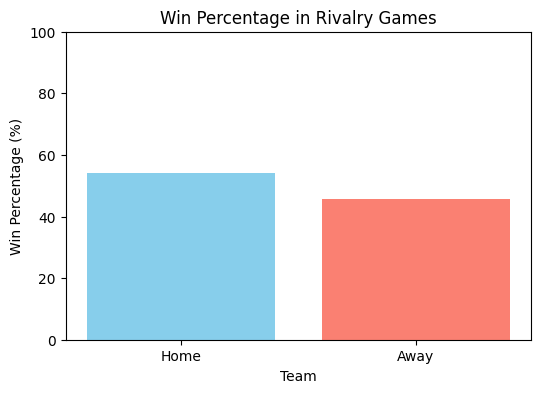

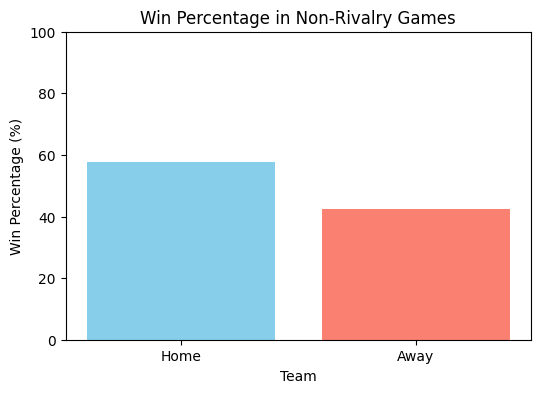

In [135]:
rivalry_win_percentages = [home_win_percentage_rivalry, away_win_percentage_rivalry]
labels = ['Home', 'Away']

plt.figure(figsize=(6, 4))
plt.bar(labels, rivalry_win_percentages, color=['skyblue', 'salmon'])
plt.title('Win Percentage in Rivalry Games')
plt.xlabel('Team')
plt.ylabel('Win Percentage (%)')
plt.ylim(0, 100)
plt.show()

non_rivalry_win_percentages = [home_win_percentage_non_rivalry, away_win_percentage_non_rivalry]
labels = ['Home', 'Away']

plt.figure(figsize=(6, 4))
plt.bar(labels, non_rivalry_win_percentages, color=['skyblue', 'salmon'])
plt.title('Win Percentage in Non-Rivalry Games')
plt.xlabel('Team')
plt.ylabel('Win Percentage (%)')
plt.ylim(0, 100) 
plt.show()

### **What can be drawn from this:** 
The visualizations above suggest that rivalry matchups tend to be closer games, with smaller win margins compared to non-rivalry games. However, the data still **supports** the concept of __home-field advantage__, as home teams win by an average of 15% more than away teams in non-rivalry matchups and by 5% more in rivalry games. In every graph, the home team consistently outperforms the away team on average, further **reinforcing** the idea of **home-field advantage**.

To **statistically validate** these visual observations, I conducted two **t-tests** to determine if the differences in _win margins_ and _win percentages_ between **rivalry** and **non-rivalry games** are **significant**. This will help us confirm whether the trends shown in the graphs are due to chance or reflect a meaningful pattern.

In [136]:
rivalry_margins = merged_game_data[merged_game_data['is_rivalry'] == True]['home_win_margin']
non_rivalry_margins = merged_game_data[merged_game_data['is_rivalry'] == False]['home_win_margin']

t_stat_rivalry, p_value_rivalry = stats.ttest_ind(rivalry_margins, non_rivalry_margins, nan_policy='omit')

print(f"Rivalry vs. Non-Rivalry Games - T-statistic: {t_stat_rivalry}, P-value: {p_value_rivalry}")

Rivalry vs. Non-Rivalry Games - T-statistic: -3.065229399285348, P-value: 0.002179108878479995


This result shows that **home teams** tend to win by **smaller margins** in **rivalry games** compared to **non-rivalry games**. The intensity and competitiveness of rivalry games likely contribute to **closer matchups**, making it harder for the **home team** to win by a large margin.

In [137]:
rivalry_win_rates = merged_game_data[merged_game_data['is_rivalry'] == True]['home_team_won']
non_rivalry_win_rates = merged_game_data[merged_game_data['is_rivalry'] == False]['home_team_won']

t_stat_win_rivalry, p_value_win_rivalry = stats.ttest_ind(rivalry_win_rates, non_rivalry_win_rates, nan_policy='omit')

print(f"Rivalry vs. Non-Rivalry Win Rates - T-statistic: {t_stat_win_rivalry}, P-value: {p_value_win_rivalry}")

Rivalry vs. Non-Rivalry Win Rates - T-statistic: -2.8693584943215797, P-value: 0.004119115185911054


The **t-test** comparing **win rates** in _rivalry_ vs. _non-rivalry_ games resulted in a **T-statistic of -2.87** and a **P-value of 0.0041**, indicating a **statistically significant difference**. The _negative t-statistic_ suggests that home teams win **less** often in **rivalry games** compared to **non-rivalry games**. This shows that rivalry games tend to be **more competitive**, making it **harder** for home teams to secure a win, even though they typically have the home-field advantage.

_________________________________________________________________________________________________________________________________________